In [2]:
%load_ext autoreload
%autoreload 2


import cv2
import matplotlib.pyplot as plt
import numpy as np

import torch
import sys
sys.path.append('../..')
sys.path.append('..')
import scripts.extract_objects as extract_objects
import utilities.utilities_images as utilities_images


torch.cuda.empty_cache()  # Libère la mémoire GPU inutilisée

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using cache found in /Users/avicenne/.cache/torch/hub/pytorch_vision_v0.10.0


In [3]:
PATH_FOLDER_IMG  = "./static/images/"
PATH_DB          = "./static/vector_store/"
UPDATE_DB        = True

if not extract_objects.vector_store_exist():
    print("not created")
    db, vectorizer, data_loader = extract_objects.init_search_engine_images(PATH_FOLDER_IMG, PATH_DB)
     
elif UPDATE_DB:
    print("need update")
    db, vectorizer, data_loader = extract_objects.init_search_engine_images(PATH_FOLDER_IMG, PATH_DB)    
    
else:
    print("loading")
    db, vectorizer, data_loader = extract_objects.init_search_engine_images(PATH_FOLDER_IMG, PATH_DB, PATH_DB)
    

need update
11 images found in folder
Vectorisation des images...
...Vectorisation terminée


`embedding_function` is expected to be an Embeddings object, support for passing in a function will soon be removed.


Vector Database: 13 docs
be carefull ./static/vector_store/ already exists and is being replaced
./static/vector_store/ stored in ./static/vector_store/


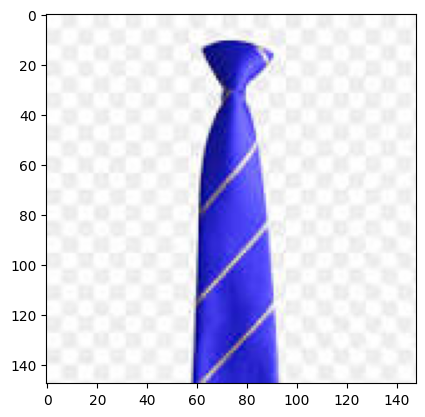

In [4]:
img = cv2.imread("./static/images/cravate2.jpeg")
plt.imshow(img) 

In [5]:
images_results, draw_img = extract_objects.search_engine_image(query= cv2.imread("./static/images/Asap_Rocky4.jpeg"), 
                                                                db=db, 
                                                                vectorizer=vectorizer, 
                                                                data_loader=data_loader, 
                                                                nb_similar=5)
images_results

3 objects detected
Vectorisation des images...
...Vectorisation terminée
{'images_path': './static/images/Asap_Rocky4.jpeg', 'image_label': 'person', 'image_position': 6}
{'images_path': './static/images/Asap_Rocky4.jpeg', 'image_label': 'person', 'image_position': 7}
{'images_path': './static/images/Asap_Rocky4.jpeg', 'image_label': 'person', 'image_position': 7}
{'images_path': './static/images/Asap_Rocky4.jpeg', 'image_label': 'person', 'image_position': 6}
{'images_path': './static/images/Asap_Rocky4.jpeg', 'image_label': 'tie', 'image_position': 8}
{'images_path': './static/images/cravate2.jpeg', 'image_label': 'tie', 'image_position': 11}
{'images_path': './static/images/cravatte1.jpeg', 'image_label': 'tie', 'image_position': 10}
{'images_path': './static/images/cravate0.jpeg', 'image_label': 'tie', 'image_position': 2}


{'person': {'images_path': ['./static/images/Asap_Rocky4.jpeg',
   './static/images/Asap_Rocky4.jpeg'],
  'labels': ['person', 'person'],
  'img': [tensor([[[0.2196, 0.2196, 0.2235,  ..., 0.0510, 0.0471, 0.0431],
            [0.2157, 0.2157, 0.2157,  ..., 0.0588, 0.0588, 0.0588],
            [0.2078, 0.2078, 0.2039,  ..., 0.0588, 0.0706, 0.0745],
            ...,
            [0.4353, 0.4745, 0.5529,  ..., 0.7098, 0.7176, 0.7216],
            [0.5294, 0.5373, 0.5529,  ..., 0.6980, 0.7020, 0.7059],
            [0.4588, 0.4745, 0.5059,  ..., 0.6980, 0.7020, 0.7020]],
   
           [[0.2314, 0.2314, 0.2275,  ..., 0.0392, 0.0353, 0.0314],
            [0.2235, 0.2235, 0.2196,  ..., 0.0471, 0.0471, 0.0471],
            [0.2157, 0.2118, 0.2078,  ..., 0.0471, 0.0588, 0.0627],
            ...,
            [0.5529, 0.5765, 0.6353,  ..., 0.6863, 0.6941, 0.6980],
            [0.6275, 0.6275, 0.6235,  ..., 0.6745, 0.6784, 0.6824],
            [0.5333, 0.5412, 0.5608,  ..., 0.6784, 0.6824, 0.6824]],

In [6]:
list(images_results.keys())[0]

'person'

In [100]:
list(set([1,1,1,1,1]))

[1]

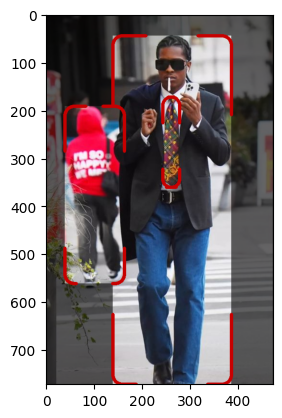

In [7]:
plt.imshow(draw_img)

In [8]:
extract_objects.count_files_in_directory("./static/input")

AttributeError: module 'scripts.extract_objects' has no attribute 'count_files_in_directory'